In [1]:
import os, json, random
import pandas as pd
from pathlib import Path

while ".git" not in os.listdir(os.getcwd()): prj_dir = os.chdir(Path(os.getcwd())/"..")

from utils.boxes import xywh2xy_xy, xyxy2xywh

In [2]:
source_name = 'vedai'
data_folder = Path(f'data/sources/{source_name}')

In [3]:
img_infos = {int(f[0:8]): {'file_name': str(data_folder/'Vehicules512'/f), 'annotations': [] } for f in os.listdir(data_folder/'Vehicules512') if f.endswith("_co.png")}
annotations_df = pd.read_csv(data_folder/'Annotations512/annotation512.txt', sep=" ", header=None)

print(annotations_df[12].value_counts())

annotations_df

12
1     1377
11     955
5      397
2      307
10     204
4      190
23     171
9      101
31      48
7        4
8        3
Name: count, dtype: int64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,290.348971,504.611640,3.012318,277,303,304,279,502,498,508,511,2,1,0
1,1,172.413736,406.184469,-0.013888,163,182,181,164,403,403,410,410,1,1,0
2,1,206.608929,405.621843,-0.011363,196,218,218,195,402,402,409,410,9,1,0
3,2,303.293673,423.169296,1.446441,297,308,310,299,414,413,433,434,5,1,0
4,3,438.593124,445.611015,0.013333,420,458,457,420,440,440,452,451,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3752,1270,120.157657,425.654822,-0.021974,108,131,132,110,422,422,430,431,11,1,0
3753,1270,153.969554,423.026587,-3.098142,143,166,166,143,419,419,428,427,23,1,0
3754,1270,226.696355,147.975370,-1.516502,223,232,231,221,136,137,160,160,9,1,0
3755,1270,365.536608,139.161225,-1.528139,359,374,371,359,119,119,161,159,5,1,0


In [4]:
for index, row in annotations_df.iterrows():
    if row[12] not in [31, 23]:
        center = (row[1], row[2])
        polygon = ((row[4], row[8]), (row[5], row[9]), (row[6], row[10]), (row[7], row[11]))
        bbox = [min(row[4:8].values), min(row[8:12].values), max(row[4:8].values), max(row[8:12].values)]
        img_infos[row[0]]['annotations'].append({
            'center': center,
            'polygon': polygon,
            'bbox': xyxy2xywh(bbox)
        })

img_infos

{0: {'file_name': 'data/sources/vedai/Vehicules512/00000000_co.png',
  'annotations': [{'center': (290.348971, 504.61164),
    'polygon': ((277.0, 502.0),
     (303.0, 498.0),
     (304.0, 508.0),
     (279.0, 511.0)),
    'bbox': (277.0, 498.0, 27.0, 13.0)}]},
 1: {'file_name': 'data/sources/vedai/Vehicules512/00000001_co.png',
  'annotations': [{'center': (172.413736, 406.184469),
    'polygon': ((163.0, 403.0),
     (182.0, 403.0),
     (181.0, 410.0),
     (164.0, 410.0)),
    'bbox': (163.0, 403.0, 19.0, 7.0)},
   {'center': (206.608929, 405.621843),
    'polygon': ((196.0, 402.0),
     (218.0, 402.0),
     (218.0, 409.0),
     (195.0, 410.0)),
    'bbox': (195.0, 402.0, 23.0, 8.0)}]},
 2: {'file_name': 'data/sources/vedai/Vehicules512/00000002_co.png',
  'annotations': [{'center': (303.293673, 423.169296),
    'polygon': ((297.0, 414.0),
     (308.0, 413.0),
     (310.0, 433.0),
     (299.0, 434.0)),
    'bbox': (297.0, 413.0, 13.0, 21.0)}]},
 3: {'file_name': 'data/sources/vedai

In [7]:
with open(f'data/unified/sources/{source_name}.json', 'w') as f:
    json.dump(list(img_infos.values()), f, indent = 4)

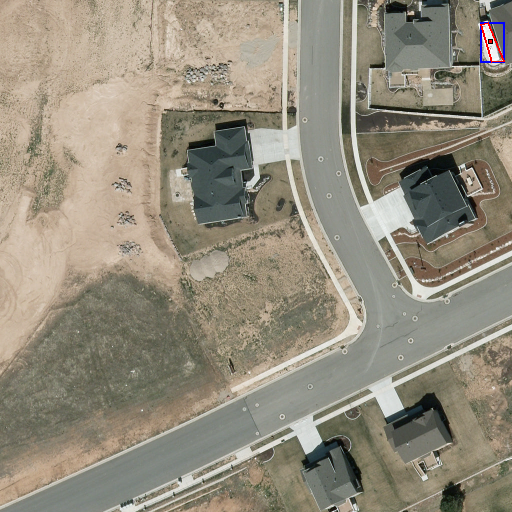

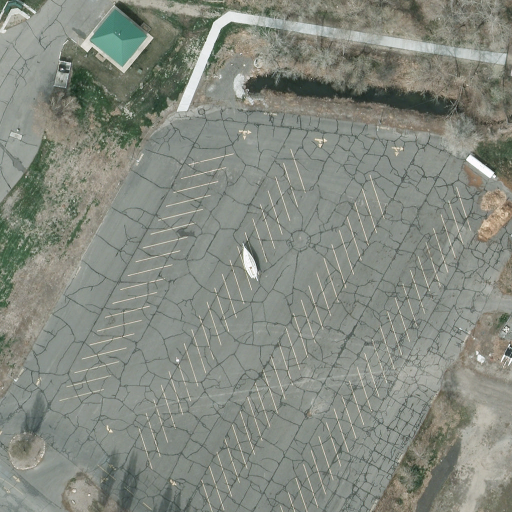

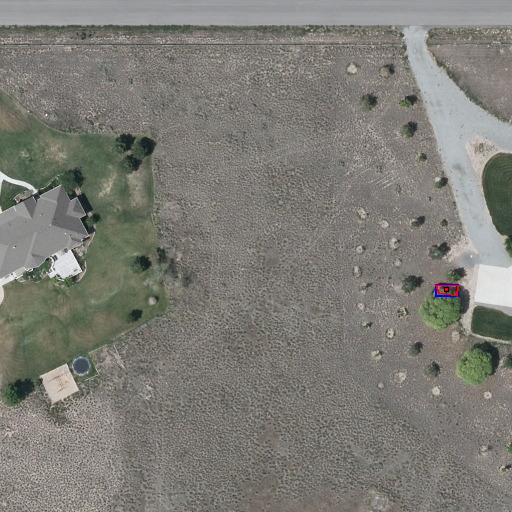

In [9]:
from PIL import Image, ImageDraw

def center2rect(center):
    return ((center[0] - 2, center[1] - 2), (center[0] + 2, center[1] + 2))
    
def drawTest(img_info):
    img = Image.open(img_info['file_name'])
    draw = ImageDraw.Draw(img)

    for a in img_info['annotations']:
        draw.rectangle(center2rect(a['center']), outline="black", fill="red", width=1)
        draw.rectangle(xywh2xy_xy(a['bbox']), outline="blue",  width=2)
        draw.polygon(a['polygon'], outline="red",  width=2)

    display(img)    


keys_s = list(img_infos.keys())
random.shuffle(keys_s)

for i in range(3):
    k = keys_s[i]
    img_info = img_infos[k]
    drawTest(img_info)